# 01. Check a single year file

In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample_file = './basin_outlet_discharge/AMAZONAS_2000.grib2'

In [3]:
ds = xr.open_mfdataset(
    sample_file,
    engine='cfgrib',
    combine='nested',  # Combine files by coordinates
    concat_dim='time',
    parallel=True,
    # indexpath = None
)

In [4]:
ds

<xarray.Dataset>
Dimensions:     (time: 366, latitude: 5, longitude: 6)
Coordinates:
  * time        (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -0.475 -0.525 -0.575 -0.625 -0.675
  * longitude   (longitude) float64 308.9 309.0 309.0 309.1 309.1 309.2
    valid_time  (time) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
Data variables:
    dis24       (time, latitude, longitude) float32 dask.array<chunksize=(366, 5, 6), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-17T14:19 GRIB to CDM+CF via cfgrib-0.9.1...

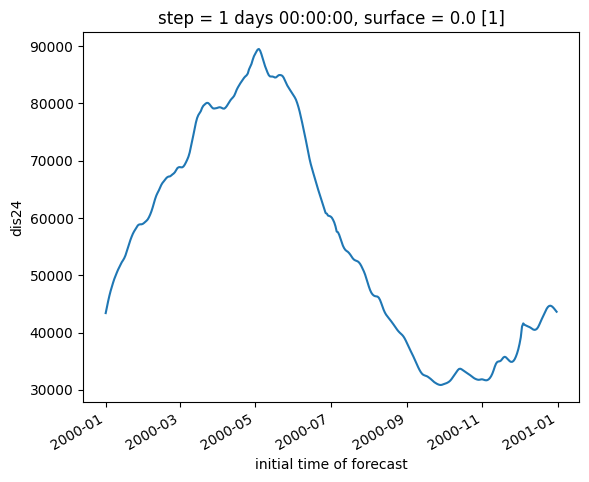

In [8]:
ds.dis24.mean(dim = ['latitude', 'longitude']).plot()

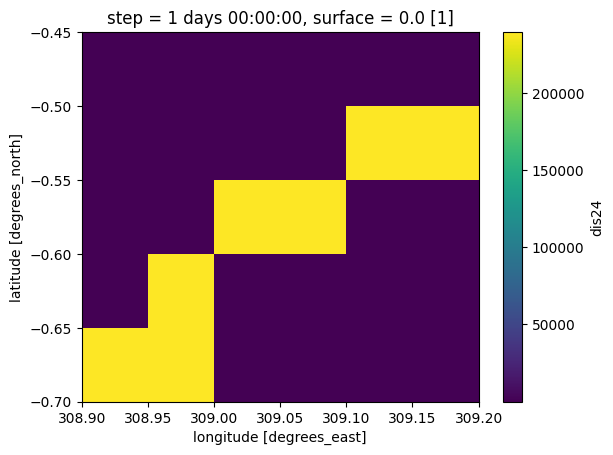

In [9]:
ds.dis24.mean(dim = ['time']).plot()

# 02. Check at basin scale?